## Problem statement


Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

 

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

Which type of hosts to acquire more and where?
The categorisation of customers based on their preferences.
What are the neighbourhoods they need to target?
What is the pricing ranges preferred by customers?
The various kinds of properties that exist w.r.t. customer preferences.
Adjustments in the existing properties to make it more customer-oriented.
What are the most popular localities and properties in New York currently?
How to get unpopular properties more traction? and so on...
Note: These points are just to give you an initial understanding of how to proceed with the analysis and the kind of questions you need to ask. In addition to this, you would need to further understand the data (attached below in this page) and analyse important insights that you feel are required for the audiences mentioned for each of the two presentations.

# Step 1: Reading and Understanding the Data

###   Importing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import re
import datetime
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor


#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Import Dataset

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
print(data.shape)

(48895, 16)


In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
data = data.set_index('id')

In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

### Remove columns which are not useful for modelling/analysis

In [6]:
data.drop(['host_name','last_review'], axis=1, inplace=True)

In [7]:
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Step 2: Data Preparation

Lets analyse the features that are given to us. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365          

In [9]:
all_columns = list(data.columns)

In [10]:
numerical_cols       = ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
categorical_cols     = ['neighbourhood_group','neighbourhood', 'room_type']
location_variables   = ['latitude','longitude']
id_columns           = ['host_id']

In [11]:
data[numerical_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
data.drop_duplicates() #- remove duplicates

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27


In [13]:
data.shape

(48895, 13)

In [14]:
constant_columns = [col for col in data.columns if len(data[col].unique()) <=2] # to see even blank values in the constant columns
                                                                                #otherwise it should be equal to 1

In [15]:
constant_columns

[]

### Missing Value Analysis

In [16]:
missing_data_percent = 100*data.isnull().sum()/(data.shape[0])
# missing_data_percent[missing_data_percent>0].sort_values(ascending=False)

In [17]:
missing_data_percent

name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### Impute Missing Values

In [18]:
data.reviews_per_month.fillna(0, inplace=True)

In [19]:
missing_data_percent = 100*data.isnull().sum()/(data.shape[0])

In [20]:
missing_data_percent

name                              0.032723
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [21]:
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Step 3: Exploratory Data Analysis 

In [22]:
eda_data = data.copy()

### Univariate Numerical Analysis

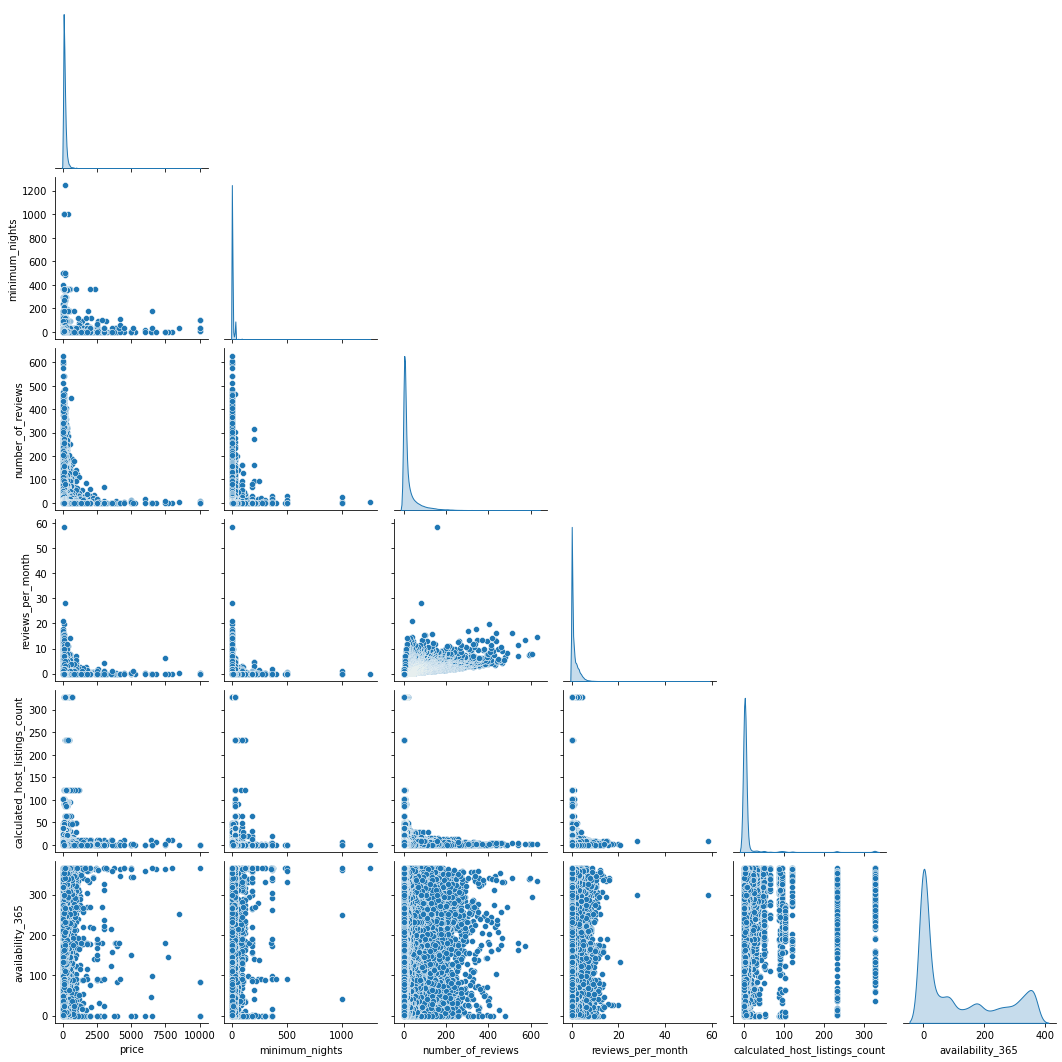

In [23]:
sns.pairplot(eda_data[numerical_cols],corner=True,diag_kind='kde')
plt.show()

- There is an inverse relationship between price and the minimum number of nights required to stay
- Suprisingly, there is no clear relationship between price and the availaibility of the listing. 
- There are a few listings with minimum nights as high are 1000
- The distribution of availability of a hotel is bimodal, with one mode close to 0 and a second mode almost at 350 days.

### Univariate Categorical Analysis

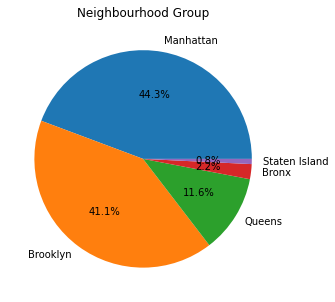

In [24]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(eda_data.neighbourhood_group.value_counts(), labels=eda_data.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=0)
plt.show()

- Most of the listings are concentrated in Manhattan and Brooklyn

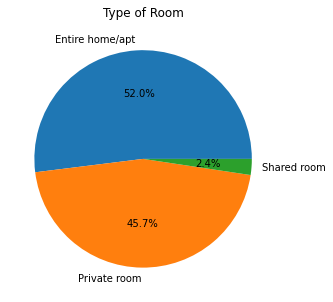

In [25]:
plt.figure(figsize=(10,5))
plt.title("Type of Room")
g = plt.pie(eda_data.room_type.value_counts(), labels=eda_data.room_type.value_counts().index,autopct='%1.1f%%', startangle=0)
plt.show()

- There is very low interest for Shared rooms from Customers.
- Most of the customers prefer Entire home/apt indicating that customers tend to stay in groups

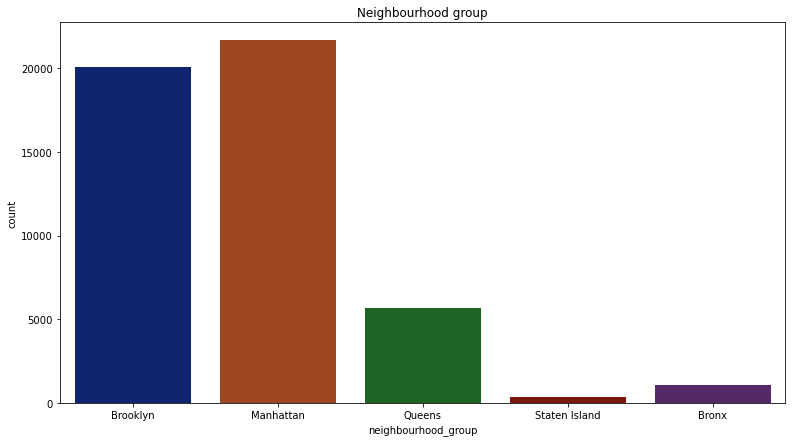

In [26]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood group")
sns.countplot(eda_data.neighbourhood_group, palette="dark")
fig = plt.gcf()
plt.show()

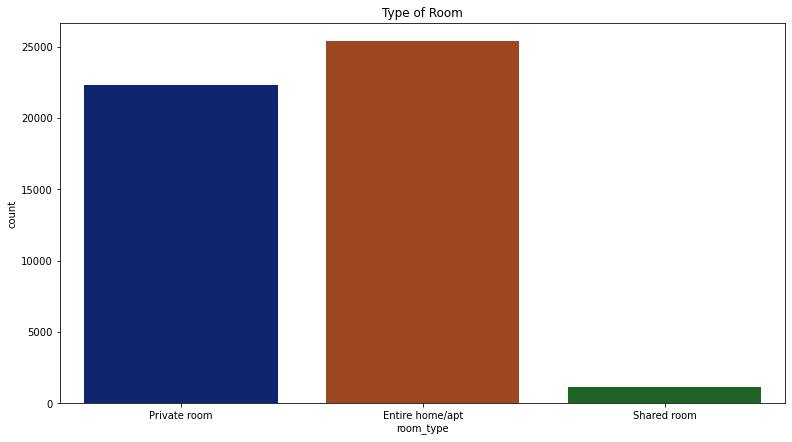

In [27]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(eda_data.room_type, palette="dark")
fig = plt.gcf()
plt.show()

### Bivariate analysis

In [28]:
#https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
BBox = (eda_data.longitude.min(), eda_data.longitude.max(), eda_data.latitude.min(), eda_data.latitude.max())

In [29]:
BBox

(-74.24442, -73.71299, 40.49979, 40.91306)

In [30]:
nyc_m = plt.imread('map1.png')

In [31]:
eda_data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

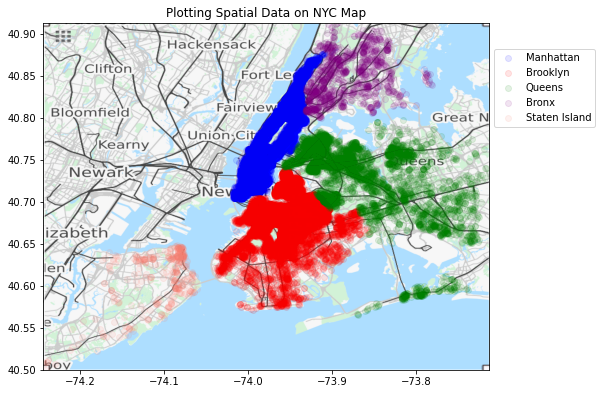

In [32]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(eda_data[eda_data['neighbourhood_group']=='Manhattan'].longitude, eda_data[eda_data['neighbourhood_group']=='Manhattan'].latitude, zorder=1, alpha= 0.1, c='b', label='Manhattan')
ax.scatter(eda_data[eda_data['neighbourhood_group']=='Brooklyn'].longitude, eda_data[eda_data['neighbourhood_group']=='Brooklyn'].latitude, zorder=1, alpha= 0.1, c='r', label='Brooklyn')
ax.scatter(eda_data[eda_data['neighbourhood_group']=='Queens'].longitude, eda_data[eda_data['neighbourhood_group']=='Queens'].latitude, zorder=1, alpha= 0.1, c='g', label='Queens')
ax.scatter(eda_data[eda_data['neighbourhood_group']=='Bronx'].longitude, eda_data[eda_data['neighbourhood_group']=='Bronx'].latitude, zorder=1, alpha= 0.1, c='purple', label='Bronx')
ax.scatter(eda_data[eda_data['neighbourhood_group']=='Staten Island'].longitude, eda_data[eda_data['neighbourhood_group']=='Staten Island'].latitude, zorder=1, alpha= 0.1, c='salmon', label='Staten Island')
ax.set_title('Plotting Spatial Data on NYC Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(loc=[1.01,0.7])
ax.imshow(nyc_m, zorder=0, extent = BBox, aspect= 'equal')

In [33]:
eda_data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [34]:
price_labels = ["Very cheap", "Cheap", "Moderate", "Expensive", "Very expesive"]
eda_data['price_bin'] = pd.qcut(eda_data['price'], [0, .2, .4, .6, .8, 1.], labels=price_labels)

In [35]:
"""
Very cheap     -  0 $ to 60 $
Cheap          -  60 $ to 90 $
Moderate       -  90 $ to 130 $
Expensive      -  130 $ to 200 $
Very Expensive -  200 $ to 10000 $

"""
eda_data['price'].quantile([0, .2, .4, .6, .8, 1.])


0.0        0.0
0.2       60.0
0.4       90.0
0.6      130.0
0.8      200.0
1.0    10000.0
Name: price, dtype: float64

In [36]:
eda_data['price_bin'].value_counts()

Expensive        10809
Very cheap       10063
Cheap             9835
Moderate          9804
Very expesive     8384
Name: price_bin, dtype: int64

- There is almost an uniform distribution among the with the price ranges for the listings in NYC, with a slight high population of expensive hotels who charge 130 to 200 dollars per night. 

In [37]:
availability_labels =  ["Very low availability", "low availability",  "high availability", "Very high availability"]

eda_data['availability_bin'] = pd.qcut(eda_data['availability_365'], [0, .4, .6, .8, 1.], labels=availability_labels)
eda_data['availability_bin'].value_counts()

Very low availability     19787
high availability          9813
Very high availability     9744
low availability           9551
Name: availability_bin, dtype: int64

- Majority of the hotels(almost 50%) tend to have very low availability (0 to 8 days in a year) 

In [38]:
"""
Very low availability     -  0 to 8 
Low availability          -  8 to 92
High availability      -  92 to 272
Very high availability -  272 to 365

"""
eda_data['availability_365'].quantile([0, .4, .6, .8, 1.])


0.0      0.0
0.4      8.0
0.6     92.0
0.8    272.0
1.0    365.0
Name: availability_365, dtype: float64

In [39]:
review_labels =  ["Very low reviews", "low reviews", "high reviews", "Very high reviews"]

eda_data['reviews_bin'] = pd.qcut(eda_data['number_of_reviews'], [0,.4, .6, .8, 1.], labels=review_labels)
eda_data['reviews_bin'].value_counts()

Very low reviews     21281
high reviews          9714
Very high reviews     9661
low reviews           8239
Name: reviews_bin, dtype: int64

- Again the majority of the listings have a very poor number of reviews associated with them ( 0 to 3 reviews) 

In [40]:
"""
Very low reviews     -  0 to 3
Low reviews          -  3 to 9
High reviews      -  9 to 33
Very high reviews -  33 to 629

"""
eda_data['number_of_reviews'].quantile([0, .4, .6, .8, 1.])


0.0      0.0
0.4      3.0
0.6      9.0
0.8     33.0
1.0    629.0
Name: number_of_reviews, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

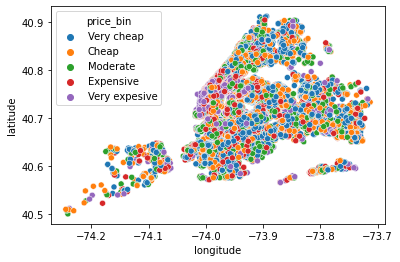

In [41]:
sns.scatterplot(data=eda_data, x="longitude", y="latitude", hue="price_bin")

- Very expensive hotels are located at lower manhattan

In [42]:
listings_table = pd.crosstab(eda_data['neighbourhood_group'], eda_data['room_type'])
listings_table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


- Manhattan is the only exception in the neighbourhood groups where it has higher entire home/apt listings more than that of Private room  

In [43]:
price_group_table = pd.crosstab([eda_data['neighbourhood_group'], eda_data['room_type']], eda_data['price_bin'])
price_group_table

price_bin                            Very cheap  Cheap  Moderate  Expensive  \
neighbourhood_group room_type                                                 
Bronx               Entire home/apt          34    114       127         68   
                    Private room            416    169        41         18   
                    Shared room              49      6         2          2   
Brooklyn            Entire home/apt         193   1149      2851       3463   
                    Private room           4874   3493      1235        384   
                    Shared room             345     28        21         13   
Manhattan           Entire home/apt          64    510      2134       5097   
                    Private room           1578   2656      2229       1004   
                    Shared room             189    179        61         23   
Queens              Entire home/apt          99    428       714        574   
                    Private room           1925    988       306        117   
                    Shared room             161     16        12          4   
Staten Island       Entire home/apt          12     55        49         37   
                    Private room            119     42        21          4   
                    Shared room               5      2         1          1   

price_bin                            Very expesive  
neighbourhood_group room_type                       
Bronx               Entire home/apt             36  
                    Private room                 8  
                    Shared room                  1  
Brooklyn            Entire home/apt           1903  
                    Private room               146  
                    Shared room                  6  
Manhattan           Entire home/apt           5394  
                    Private room               515  
                    Shared room                 28  
Queens              Entire home/apt            281  
                    Private room                36  
                    Shared room                  5  
Staten Island       Entire home/apt             23  
                    Private room                 2  
                    Shared room                  0

- Usually the apartments in Manhattan are expensive.
- Majority of the listings in the Bronx range from Very cheap to cheap
- If someone is interested to stay in Brooklyn, it's better to stay in a Private room as they are very high in number and are very cheap compared to anyother group or room type



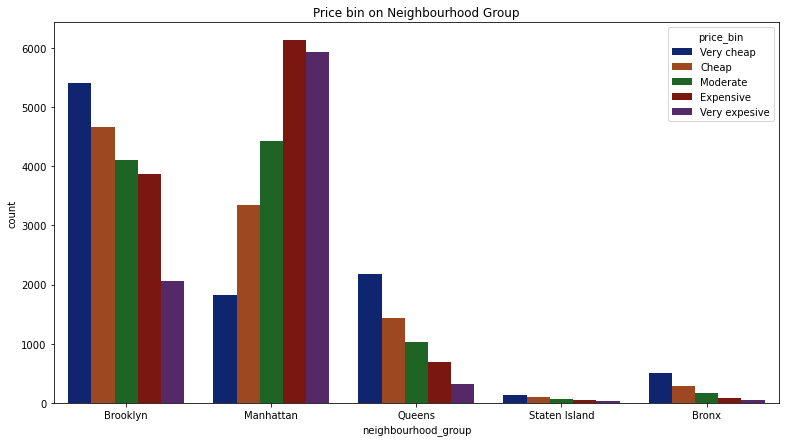

In [44]:
plt.figure(figsize=(13,7))
plt.title("Price bin on Neighbourhood Group")
sns.countplot(eda_data.neighbourhood_group,hue=eda_data.price_bin, palette="dark")
plt.show()

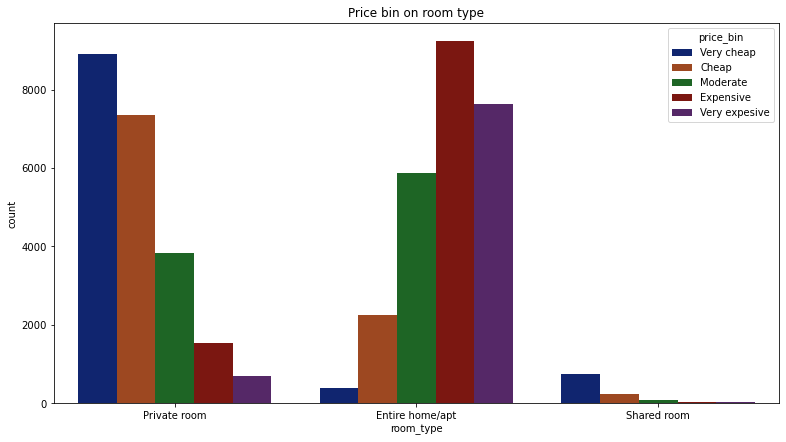

In [45]:
plt.figure(figsize=(13,7))
plt.title("Price bin on room type")
sns.countplot(eda_data.room_type,hue=eda_data.price_bin, palette="dark")
plt.show()

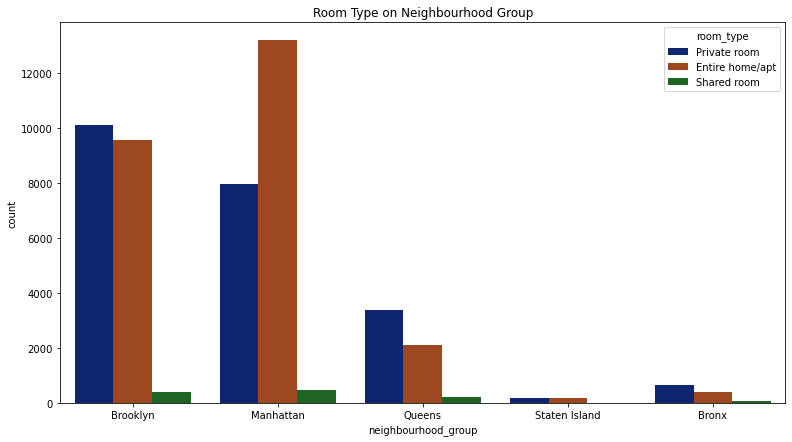

In [46]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(eda_data.neighbourhood_group,hue=eda_data.room_type, palette="dark")
plt.show()

In [47]:
price_table = pd.pivot_table(eda_data, values='price', index=[ 'neighbourhood_group'], columns=['room_type'], aggfunc=[max, np.median])
price_table

max                                   median  \
room_type           Entire home/apt Private room Shared room Entire home/apt   
neighbourhood_group                                                            
Bronx                          1000         2500         800           100.0   
Brooklyn                      10000         7500         725           145.0   
Manhattan                     10000         9999        1000           191.0   
Queens                         2600        10000        1800           120.0   
Staten Island                  5000          300         150           100.0   

                                              
room_type           Private room Shared room  
neighbourhood_group                           
Bronx                       53.5        40.0  
Brooklyn                    65.0        36.0  
Manhattan                   90.0        69.0  
Queens                      60.0        37.0  
Staten Island               50.0        30.0

- Median price of any room type is more in Manhattan when compared to other neighbourhood groups.
- Bronx is the cheapest neighbourhood group to own an entire home/apt and Staten Island is the cheapest neighbourhood group to stay in a private room or shared room

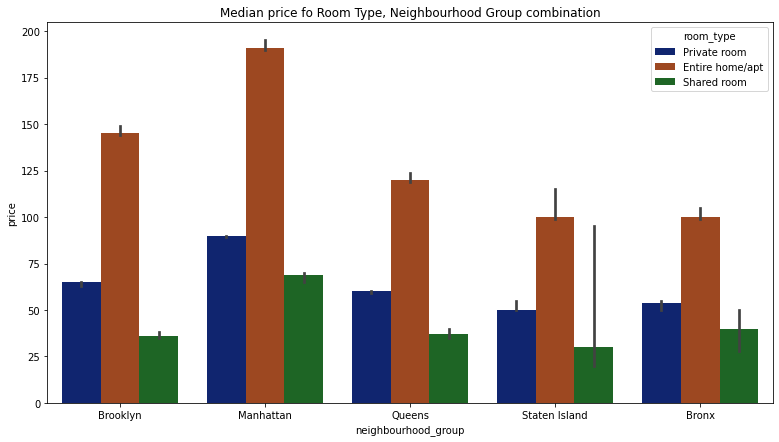

In [48]:
plt.figure(figsize=(13,7))
plt.title("Median price fo Room Type, Neighbourhood Group combination")
sns.barplot(x = "neighbourhood_group", y = "price", data = eda_data, hue="room_type", estimator=np.median, palette="dark")
plt.show()

- Variation of price for a shared room in Staten Island is very high

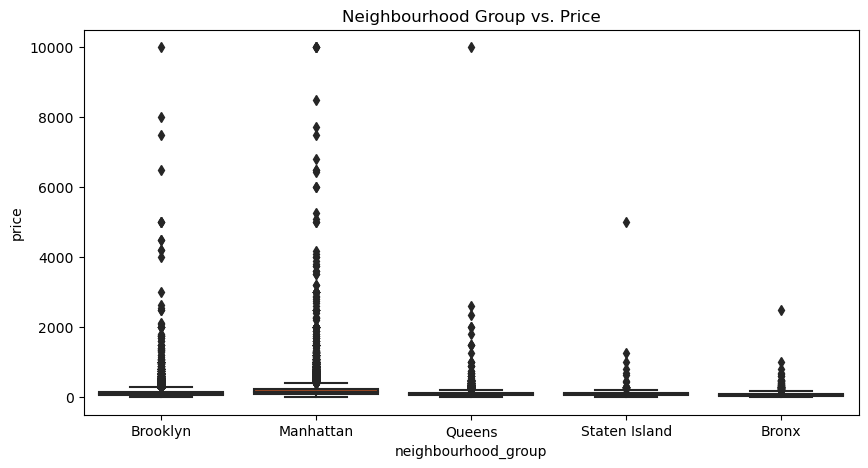

In [49]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Price")
sns.boxplot(data=eda_data, x='neighbourhood_group',y='price',palette="dark")
plt.show()

In [50]:
availability_table = pd.pivot_table(eda_data, values='availability_365', index=[ 'neighbourhood_group', 'price_bin'], columns=['room_type'], aggfunc=[ np.median])
availability_table

median                         
room_type                         Entire home/apt Private room Shared room
neighbourhood_group price_bin                                             
Bronx               Very cheap               46.5        156.0        89.0
                    Cheap                   131.5        155.0        83.5
                    Moderate                144.0        177.0       182.5
                    Expensive               106.0        213.0       189.5
                    Very expesive           322.5        224.0       269.0
Brooklyn            Very cheap                0.0          7.0       179.0
                    Cheap                     6.0         36.0        32.5
                    Moderate                 15.0         66.0        89.0
                    Expensive                35.0         83.0       179.0
                    Very expesive            75.0         88.0        85.0
Manhattan           Very cheap                0.0          3.0        83.0
                    Cheap                     1.0         17.0        90.0
                    Moderate                  4.0         34.0        23.0
                    Expensive                18.0         63.0        12.0
                    Very expesive           127.5        179.0        42.5
Queens              Very cheap               47.0         97.0       248.0
                    Cheap                    50.0        108.5        89.0
                    Moderate                 71.0        142.0        38.5
                    Expensive               117.0        168.0        80.5
                    Very expesive           253.0        134.0        90.0
Staten Island       Very cheap               13.5        279.0         8.0
                    Cheap                   175.0        300.5        37.0
                    Moderate                201.0        325.0        37.0
                    Expensive               171.0        329.0       312.0
                    Very expesive           216.0         43.5         NaN

- On an averge, it is expensive to stay at a Highly expensive listing in Bronx even when compared to Manhattan or Brooklyn
- On an average, Staten Island is the costliest location to stay at a very cheap to cheap Private room listing compared to any other neighbourhood group 

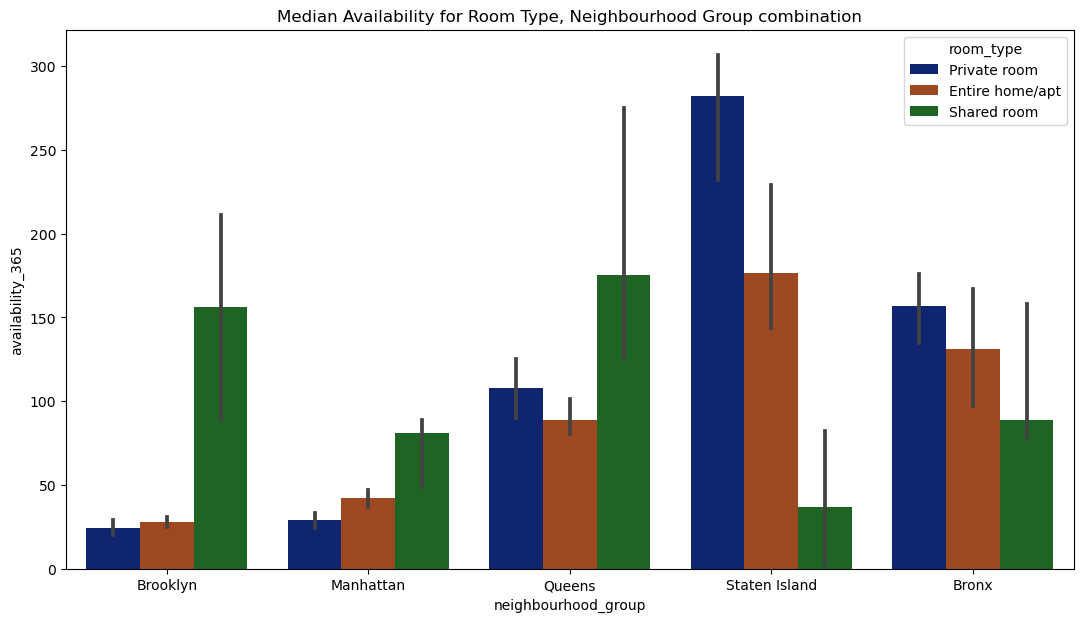

In [51]:
plt.figure(figsize=(13,7))
plt.title("Median Availability for Room Type, Neighbourhood Group combination")
sns.barplot(x = "neighbourhood_group", y = "availability_365", data = eda_data, hue="room_type", estimator=np.median, palette="dark")
plt.show()

- Price variation in Shared room is generally across all locations compared to other room types


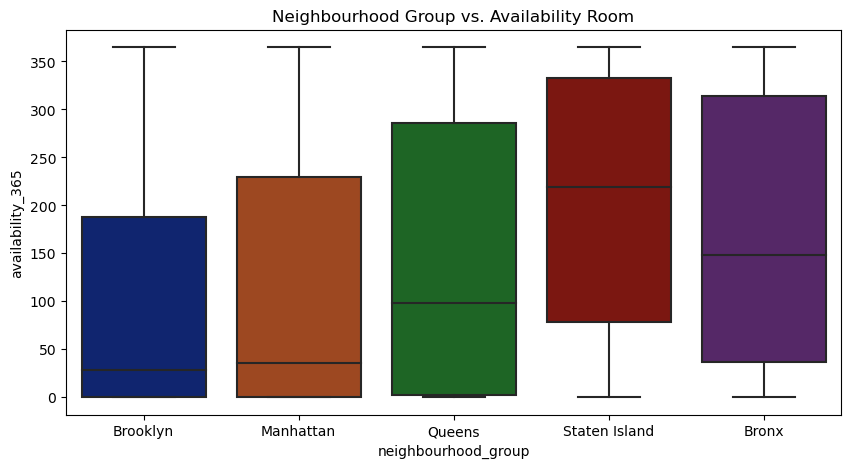

In [52]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=eda_data, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

- Availability is usually very low in Brooklyn and Manhattan and very high at Staten Island

In [53]:
min_nights_table = pd.pivot_table(eda_data, values='minimum_nights', index=[ 'neighbourhood_group', 'price_bin'], columns=['room_type'], aggfunc=[max, np.median])
min_nights_table

max                           \
room_type                         Entire home/apt Private room Shared room   
neighbourhood_group price_bin                                                
Bronx               Very cheap               90.0        365.0        90.0   
                    Cheap                   186.0         30.0         2.0   
                    Moderate                 90.0          7.0         1.0   
                    Expensive                30.0          3.0         2.0   
                    Very expesive            30.0         10.0         2.0   
Brooklyn            Very cheap              133.0        500.0        31.0   
                    Cheap                   365.0        999.0        30.0   
                    Moderate                370.0        100.0       100.0   
                    Expensive               500.0         31.0        15.0   
                    Very expesive           365.0        365.0         3.0   
Manhattan           Very cheap              365.0        240.0       120.0   
                    Cheap                   500.0        365.0        30.0   
                    Moderate                999.0        365.0       999.0   
                    Expensive              1250.0        365.0         4.0   
                    Very expesive          1000.0        365.0        60.0   
Queens              Very cheap               45.0        180.0        62.0   
                    Cheap                    98.0         90.0         5.0   
                    Moderate                210.0        180.0         5.0   
                    Expensive               500.0         30.0         3.0   
                    Very expesive           365.0        365.0         3.0   
Staten Island       Very cheap               31.0         33.0         4.0   
                    Cheap                    30.0         31.0         2.0   
                    Moderate                365.0          3.0         3.0   
                    Expensive                30.0          3.0         2.0   
                    Very expesive            30.0          1.0         NaN   

                                           median                           
room_type                         Entire home/apt Private room Shared room  
neighbourhood_group price_bin                                               
Bronx               Very cheap                2.0          2.0         1.0  
                    Cheap                     2.0          2.0         1.0  
                    Moderate                  2.0          2.0         1.0  
                    Expensive                 2.0          1.0         1.5  
                    Very expesive             2.0          1.5         2.0  
Brooklyn            Very cheap                3.0          2.0         2.0  
                    Cheap                     3.0          2.0         1.0  
                    Moderate                  3.0          2.0         1.0  
                    Expensive                 3.0          2.0         1.0  
                    Very expesive             3.0          2.0         2.0  
Manhattan           Very cheap                3.5          3.0         2.0  
                    Cheap                     4.0          2.0         1.0  
                    Moderate                  4.0          2.0         1.0  
                    Expensive                 3.0          2.0         2.0  
                    Very expesive             3.0          2.0         1.5  
Queens              Very cheap                2.0          2.0         1.0  
                    Cheap                     2.0          2.0         2.0  
                    Moderate                  2.0          2.0         1.0  
                    Expensive                 2.0          1.0         1.5  
                    Very expesive             2.0          1.0         1.0  
Staten Island       Very cheap                2.5          2.0         2.0  
             

- The median availability of all the listings is atmost 4 across different groups of price and neighborhood. 

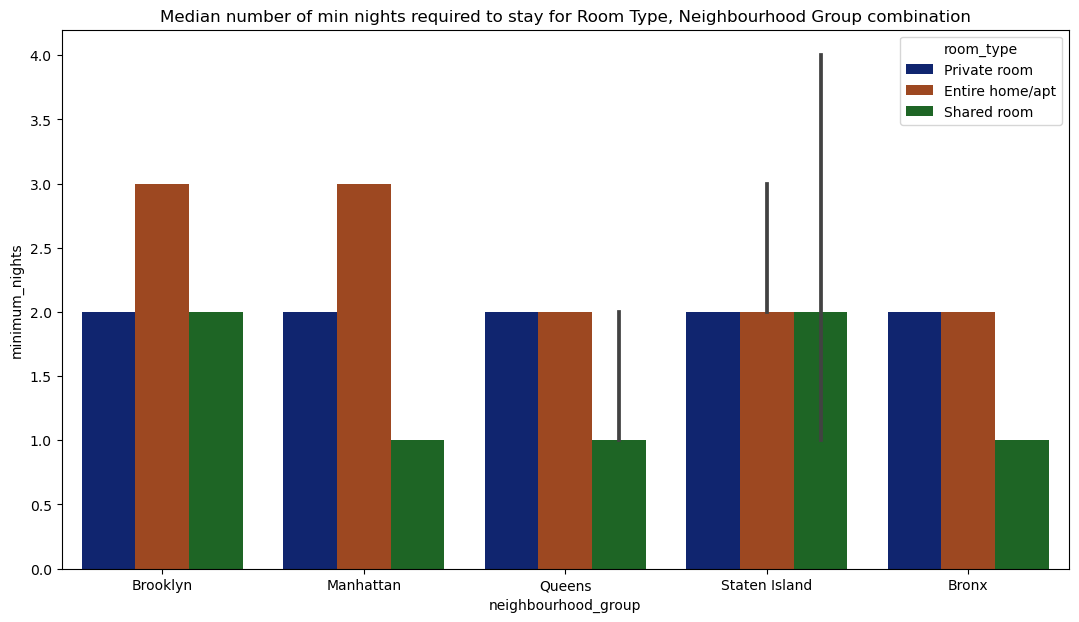

In [54]:
plt.figure(figsize=(13,7))
plt.title("Median number of min nights required to stay for Room Type, Neighbourhood Group combination")
sns.barplot(x = "neighbourhood_group", y = "minimum_nights", data = eda_data, hue="room_type", estimator=np.median, palette="dark")
plt.show()

- The median minimum number of nights is more or less the same across neighborhood groups with a slightly high variation in shared rooms of Staten Island

In [55]:
reviews_table = pd.pivot_table(eda_data, values='number_of_reviews', index=[ 'neighbourhood_group', 'price_bin'], columns=['room_type'], aggfunc=[np.median])
reviews_table

median                         
room_type                         Entire home/apt Private room Shared room
neighbourhood_group price_bin                                             
Bronx               Very cheap               10.5         12.5         3.0
                    Cheap                    11.0          5.0         0.0
                    Moderate                 19.0          1.0         0.0
                    Expensive                 8.0          1.5        10.0
                    Very expesive             2.0          0.0         1.0
Brooklyn            Very cheap                6.0          4.0         3.0
                    Cheap                     7.0          6.0         2.0
                    Moderate                  7.0          6.0         1.0
                    Expensive                 9.0          3.0         0.0
                    Very expesive             5.0          1.0         0.5
Manhattan           Very cheap                3.5          3.0         7.0
                    Cheap                     4.0          7.0         8.0
                    Moderate                  5.0          8.0         4.0
                    Expensive                 5.0          5.0         1.0
                    Very expesive             3.0          1.0         0.0
Queens              Very cheap               22.0          8.0         4.0
                    Cheap                     9.0          9.0         1.5
                    Moderate                 10.0          2.0         1.0
                    Expensive                 7.0          1.0         0.0
                    Very expesive             4.0          1.0         1.0
Staten Island       Very cheap               27.0         17.0         1.0
                    Cheap                    19.0         10.0         0.5
                    Moderate                 20.0          2.0         0.0
                    Expensive                12.0          0.0         2.0
                    Very expesive             1.0          0.5         NaN

- On an average, the listings in Staten Island tend to receive higher number of reviews

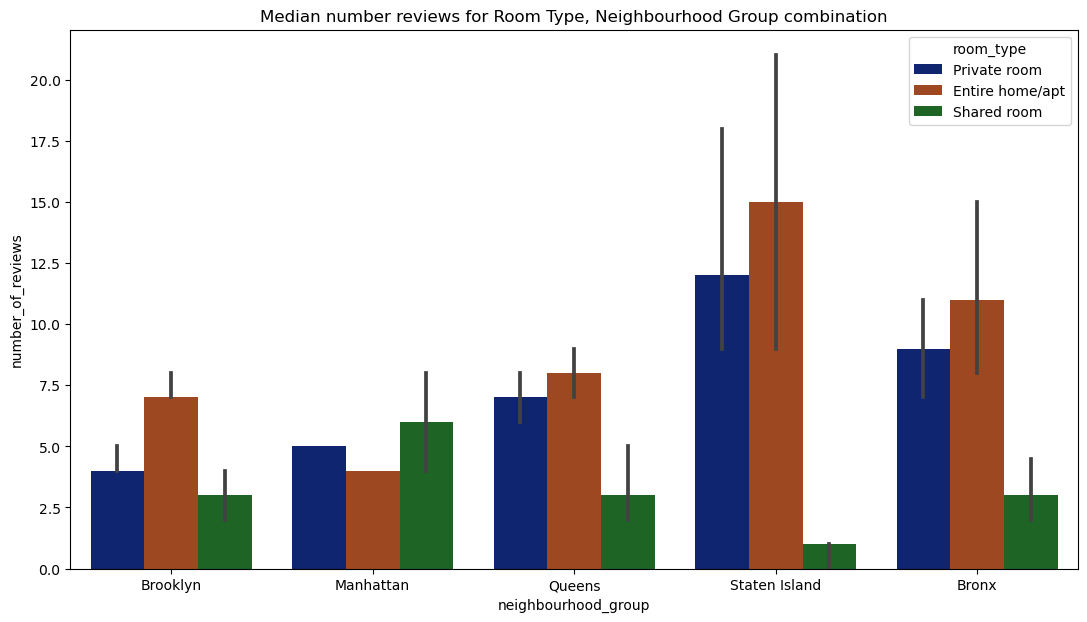

In [56]:
plt.figure(figsize=(13,7))
plt.title("Median number reviews for Room Type, Neighbourhood Group combination")
sns.barplot(x = "neighbourhood_group", y = "number_of_reviews", data = eda_data, hue="room_type", estimator=np.median, palette="dark")
plt.show()

<Figure size 1300x700 with 0 Axes>

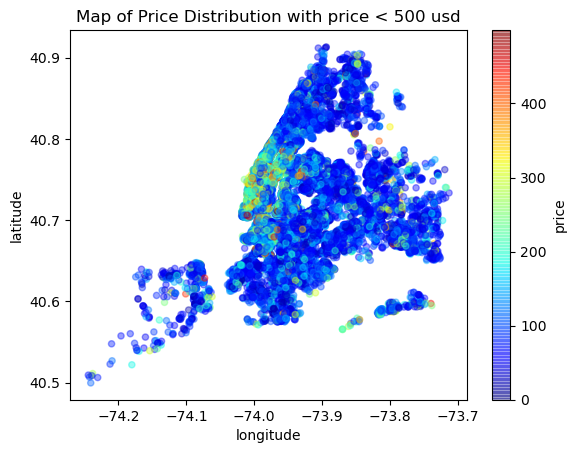

In [57]:
plt.figure(figsize=(13,7))
eda_data[eda_data.price<500].plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Map of Price Distribution with price < 500 usd")
plt.show()

- Majority of the listings have a price of 30 to 130 usd pernight

<Figure size 1300x700 with 0 Axes>

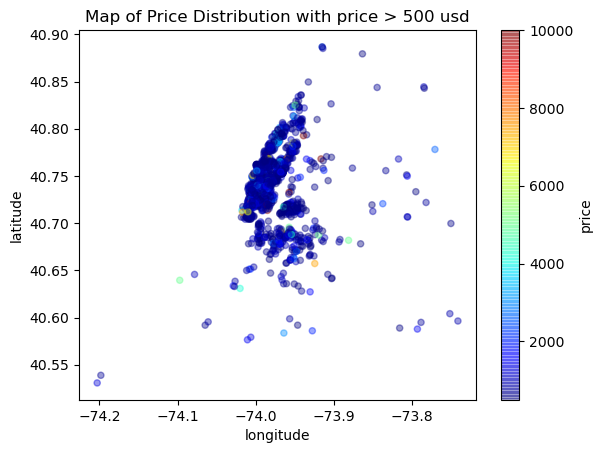

In [58]:
plt.figure(figsize=(13,7))
eda_data[eda_data.price>=500].plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Map of Price Distribution with price > 500 usd")
plt.show()

- There are very few listins with price as high as 5000 USD per night

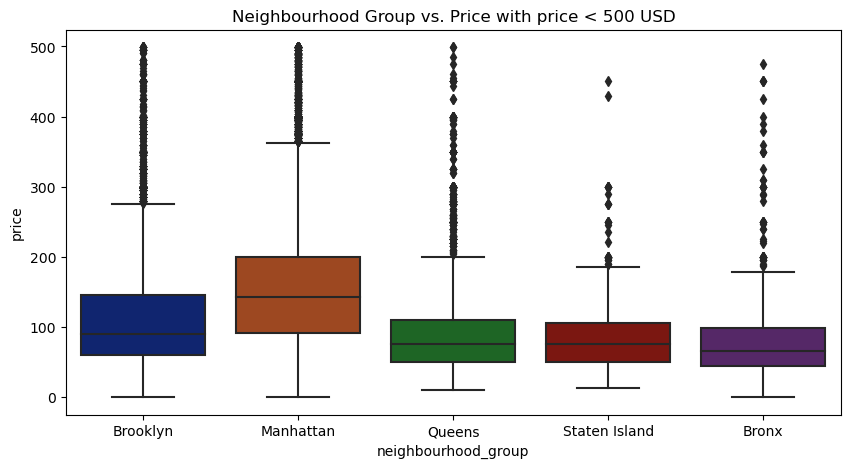

In [59]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Price with price < 500 USD")
sns.boxplot(data=eda_data[eda_data.price < 500], x='neighbourhood_group',y='price',palette="dark")
plt.show()

In [60]:
host_counts = eda_data['host_id'].value_counts()

In [61]:
host_counts.head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Text(0, 0.5, 'Count of listings')

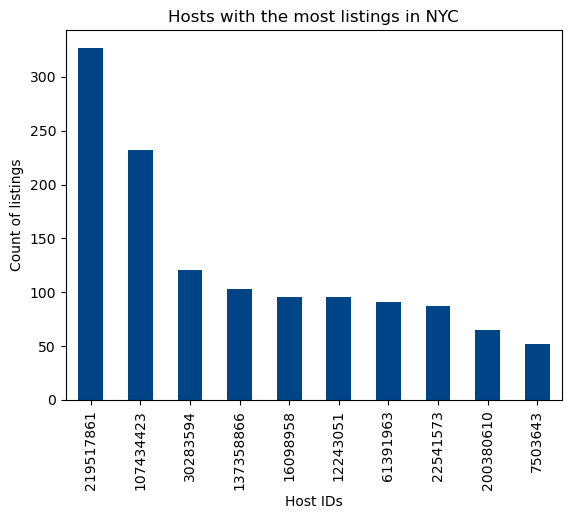

In [62]:
hosts_bar = host_counts.head(10).plot(kind='bar', color='#004488')
hosts_bar.set_title('Hosts with the most listings in NYC')
hosts_bar.set_xlabel('Host IDs')
hosts_bar.set_ylabel('Count of listings')

In [63]:
top_10_neighbourhoods = eda_data.groupby(['neighbourhood','neighbourhood_group'])['number_of_reviews'].median().sort_values(ascending=False).head(10)
top_10_neighbourhoods

neighbourhood    neighbourhood_group
Silver Lake      Staten Island          118.5
Eltingville      Staten Island           83.0
Richmondtown     Staten Island           79.0
Manhattan Beach  Brooklyn                50.0
East Morrisania  Bronx                   40.5
Lighthouse Hill  Staten Island           39.0
Pelham Gardens   Bronx                   38.5
Dyker Heights    Brooklyn                37.0
Graniteville     Staten Island           36.0
Highbridge       Bronx                   32.0
Name: number_of_reviews, dtype: float64

Text(0, 0.5, 'Medium number of reviews')

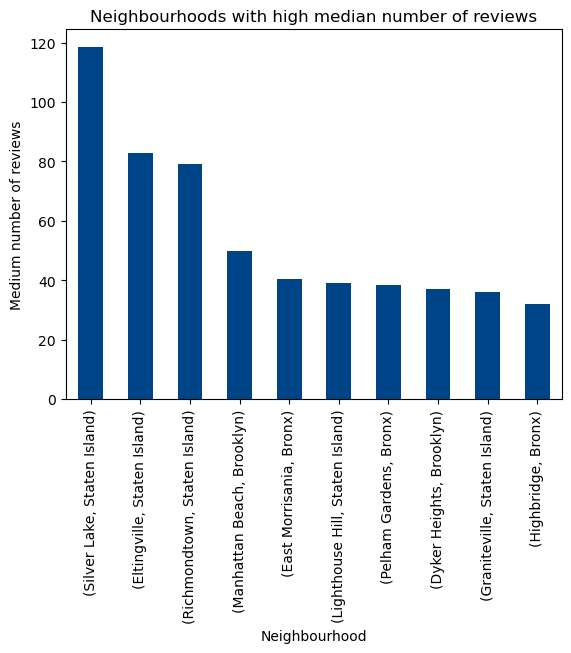

In [64]:
neigh_bar =top_10_neighbourhoods.plot(kind='bar', color = '#004488' )

neigh_bar.set_title('Neighbourhoods with high median number of reviews')
neigh_bar.set_xlabel('Neighbourhood')
neigh_bar.set_ylabel('Medium number of reviews')

- Silver Lake, Eltingville, Richmondtown from Staten Island tend to receive higher number of reviews on an average

In [65]:
#top 10 neighbourhoods with highest listings
neigh_with_high_listings = eda_data.groupby(['neighbourhood','neighbourhood_group'])['neighbourhood'].value_counts().sort_values(ascending=False).head(10)

In [66]:
neigh_with_high_listings.index = neigh_with_high_listings.index.droplevel(2)
neigh_with_high_listings

neighbourhood       neighbourhood_group
Williamsburg        Brooklyn               3920
Bedford-Stuyvesant  Brooklyn               3714
Harlem              Manhattan              2658
Bushwick            Brooklyn               2465
Upper West Side     Manhattan              1971
Hell's Kitchen      Manhattan              1958
East Village        Manhattan              1853
Upper East Side     Manhattan              1798
Crown Heights       Brooklyn               1564
Midtown             Manhattan              1545
Name: neighbourhood, dtype: int64

In [67]:
prop_top_10 = neigh_with_high_listings.sum()/eda_data['neighbourhood'].value_counts().sum()
print("Top 10 neighbourhoods contribute to", round(prop_top_10*100,2), " % of total listings in NYC")

Top 10 neighbourhoods contribute to 47.95  % of total listings in NYC


- Top 10 neighbourhoods or 221 contribute to almost 50% of listings in NYC
- All the top 10 neighbourhoods with high listings are either in Manhattan or Brooklyn

Text(0, 0.5, 'Number of listings')

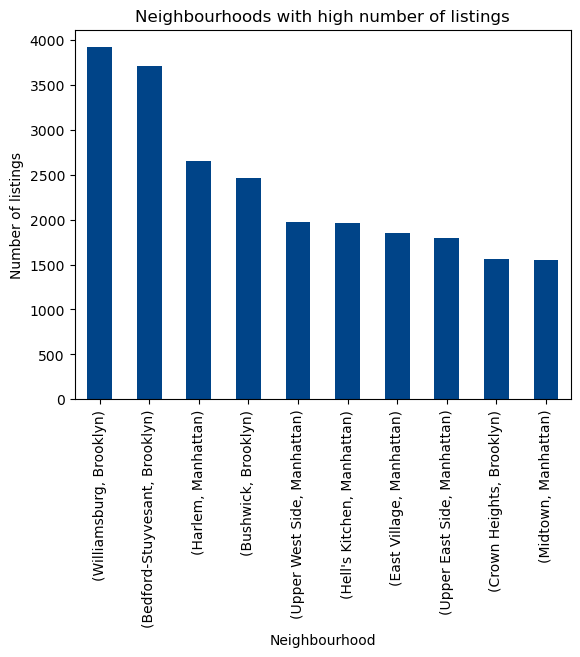

In [68]:
neigh_bar_listings =neigh_with_high_listings.plot(kind='bar', color = '#004488' )

neigh_bar_listings.set_title('Neighbourhoods with high number of listings')
neigh_bar_listings.set_xlabel('Neighbourhood')
neigh_bar_listings.set_ylabel('Number of listings')

In [69]:
top_10_neighborhoods = [ind[0] for ind in list(neigh_with_high_listings.index)]
top_10_neighborhoods

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown']

In [70]:
top_neigh_loc= eda_data[eda_data['neighbourhood'].isin(top_10_neighborhoods)]
top_neigh_loc.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_bin,availability_bin,reviews_bin
id,,,,,,,,,,,,,,,,
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Very expesive,Very high availability,Very high reviews
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,Expensive,Very high availability,Very low reviews
5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,Very cheap,Very low availability,Very high reviews
5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,Cheap,high availability,Very high reviews
5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,Cheap,Very low availability,Very high reviews


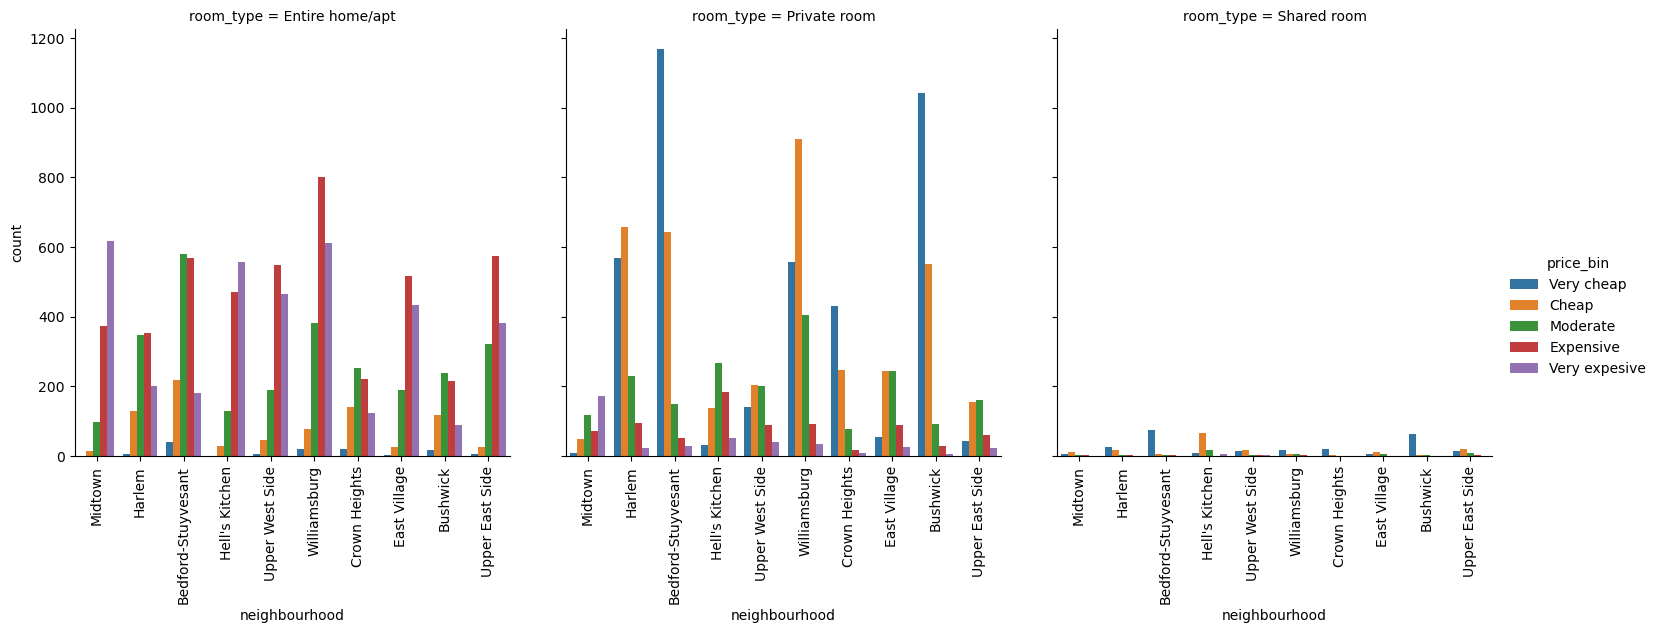

In [71]:
viz=sns.catplot(x='neighbourhood', hue='price_bin', col='room_type', data=top_neigh_loc, kind='count')
viz.set_xticklabels(rotation=90)

- Bedford stuyvesant has a large concentration of chepeast private rooms in the top 10 neighborhoods, followed by Bushwick
- All the homes/apartments in the top 10 neighbourhoods range from expensive to very expensive

### Correlation Analysis

<AxesSubplot:>

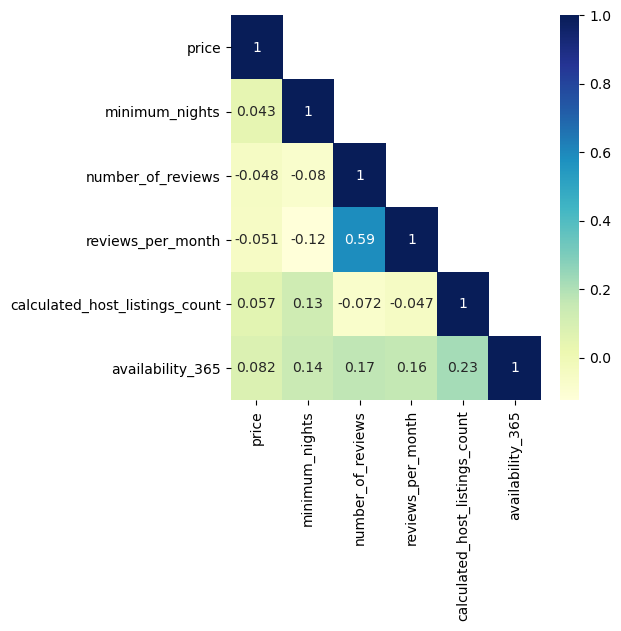

In [72]:
cor=eda_data[numerical_cols].corr()
#sns.heatmap(cor)
plt.figure(figsize=(5,5))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

# Conclusions

- There is an inverse relationship between price and the minimum number of nights required to stay
- Suprisingly, there is no clear relationship between price and the availaibility of the listing.
- There are a few listings with minimum nights as high are 1000
- The distribution of availability of a hotel is bimodal, with one mode close to 0 and a second mode almost at 350 days.
- Most of the listings are concentrated in Manhattan and Brooklyn
- There is very low interest for Shared rooms from Customers.
- Most of the customers prefer Entire home/apt indicating that customers tend to stay in groups

- There is almost an uniform distribution among the with the price ranges for the listings in NYC, with a slight high   population of expensive hotels who charge 130 to 200 dollars per night.
- Majority of the hotels(almost 50%) tend to have very low availability (0 to 8 days in a year)
- Again the majority of the listings (more than 50%) have a very poor number of reviews associated with them ( 0 to 3 reviews)
- Very expensive hotels are located at lower manhattan
- Manhattan is the only exception in the neighbourhood groups where it has higher entire home/apt listings more than that of Private room  
- Usually the apartments in Manhattan are expensive.
- Majority of the listings in the Bronx range from Very cheap to cheap
- If someone is interested to stay in Brooklyn, it's better to stay in a Private roomas they are very high in number and are very cheap compared to anyother group or room type
- Median price of any room type is more in Manhattan when compared to other neighbourhood groups.
- Bronx is the cheapest neighbourhood group to own an entire home/apt and Staten Island is the cheapest neighbourhood group to stay in a private room or shared room
- Variation of price for a shared room in Staten Island is very high
- On an averge, it is expensive to stay at a Highly expensive listing in Bronx even when compared to Manhattan or Brooklyn
- On an average, Staten Island is the costliest location to stay at a very cheap to cheap Private room listing compared to any other neighbourhood group
- Price variation in Shared room is generally across all locations compared to other room types
- Availability is usually very low in Brooklyn and Manhattan and very high at Staten Island
- The median availability of all the listings is atmost 4 across different groups of price and neighborhood.
- The median availability of listings is more or less the same across neighborhood groups and room types
  with a slightly high variation in shared rooms of Staten Island
- On an average, the listings in Staten Island tend to receive higher number of reviews followed by Bronx
- Majority of the listings have a price of 30 to 130 usd pernight
- There are very few listins with price as high as 5000 USD per night
- Silver Lake, Eltingville, Richmondtown from Staten Island tend to receive higher number of reviews on an average
- Top 10 neighbourhoods or 221 contribute to almost 50% of listings in NYC
- All the top 10 neighbourhoods with high listings are either in Manhattan or Brooklyn
- Bedford stuyvesant has a large concentration of chepeast private rooms in the top 10 neighborhoods, followed by Bushwick
- All the homes/apartments in the top 10 neighbourhoods range from expensive to very expensive

In [73]:
eda_data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_bin,availability_bin,reviews_bin
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Expensive,Very high availability,low reviews
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Very expesive,Very high availability,Very high reviews
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,Expensive,Very high availability,Very low reviews
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Cheap,high availability,Very high reviews
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Cheap,Very low availability,low reviews


In [74]:
eda_data.to_excel("airbnb_nyc_eda.xlsx", index=False)